In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [47]:
#reading file
df = pd.read_csv('/content/festivalalarm.csv')
df.head(10)

,name,sum_day,venue,festival_type,music_genre,city_or_state,string_field_7,visitors,price,date
0,NaN,NaN,NaN,NaN,NaN,NaN,"Rebgasse 12-14 Basel, CH 4058",NaN,NaN,NaN
1,Elfia Haarzuilens,2 days,outdoor,Conventions,"Folk, Gothic, Irish, Medieval, Pirate",Netherlands,Kasteel de Haar,1600,€ 30.00,04/23
2,Sammersee Benefiz Festival,2 days,outdoor,Conventions,"Africa, Blues, Crossover, Dance, Hip-Hop, Art ...",Bavaria,"Schondorf am Ammersee, DE 86938",3000,€ 20.00,07/08
3,Spencerhill Festival,2 days,outdoor,Conventions,"Country, Rock",Saxony,Urania Berlin,1500,€ 79.00,09/02
4,Elfia Arcen,2 days,outdoor,Conventions,"Folk, Gothic, Irish, Medieval, Pirate",Netherlands,Schlossgarten Arcen,4000,NaN,09/17
5,Annotopia Festival Schloss Marienburg,3 days,outdoor,Conventions,"Art & culture, Medieval, Pirate",Lower Saxony,Schloss Marienburg,6000,€ 45.00,06/04
6,Rock The Hill Festival,3 days,outdoor,Conventions,"Hip-Hop, Pop, Punk, Rock, Sports",Bavaria,Geisskopf,no data,NaN,06/17
7,Hamburg Harley Days,3 days,outdoor,Conventions,"German rock, Metal, Rock",Hamburg,Großmarkt Hamburg,500000,€ 18.00,06/24
8,Reggae Jam,3 days,outdoor,Conventions,"Reggae, Ska",Lower Saxony,Klosterpark Bersenbrück,15000,€ 75.00,07/29
9,Elbenwald Festival,3 days,outdoor,Conventions,"Folk, Gothic, Hardcore (Metal), Classical musi...",Lower Saxony,Spreeauenpark,15000,€ 69.00,08/05


In [48]:
# Mengubah tipe data kolom menjadi date
df['date'] = pd.to_datetime(df['date'], format='%m/%d')

df['date'] = df['date'].apply(lambda x: x.replace(year=2023))

# Menampilkan dataframe setelah perubahan
df.head()

,name,sum_day,venue,festival_type,music_genre,city_or_state,string_field_7,visitors,price,date
0,NaN,NaN,NaN,NaN,NaN,NaN,"Rebgasse 12-14 Basel, CH 4058",NaN,NaN,NaT
1,Elfia Haarzuilens,2 days,outdoor,Conventions,"Folk, Gothic, Irish, Medieval, Pirate",Netherlands,Kasteel de Haar,1600,€ 30.00,2023-04-23
2,Sammersee Benefiz Festival,2 days,outdoor,Conventions,"Africa, Blues, Crossover, Dance, Hip-Hop, Art ...",Bavaria,"Schondorf am Ammersee, DE 86938",3000,€ 20.00,2023-07-08
3,Spencerhill Festival,2 days,outdoor,Conventions,"Country, Rock",Saxony,Urania Berlin,1500,€ 79.00,2023-09-02
4,Elfia Arcen,2 days,outdoor,Conventions,"Folk, Gothic, Irish, Medieval, Pirate",Netherlands,Schlossgarten Arcen,4000,NaN,2023-09-17


In [49]:
# Menggantikan nilai 'no data' dengan NaN
df['visitors'] = df['visitors'].replace('no data', np.nan)

# Mengisi nilai NaN dengan angka 0
df['visitors'] = df['visitors'].fillna(0)

# Mengubah kolom "visitors" menjadi tipe data integer
df['visitors'] = df['visitors'].astype(int)

# Cetak DataFrame setelah perubahan
df

,name,sum_day,venue,festival_type,music_genre,city_or_state,string_field_7,visitors,price,date
0,NaN,NaN,NaN,NaN,NaN,NaN,"Rebgasse 12-14 Basel, CH 4058",0,NaN,NaT
1,Elfia Haarzuilens,2 days,outdoor,Conventions,"Folk, Gothic, Irish, Medieval, Pirate",Netherlands,Kasteel de Haar,1600,€ 30.00,2023-04-23
2,Sammersee Benefiz Festival,2 days,outdoor,Conventions,"Africa, Blues, Crossover, Dance, Hip-Hop, Art ...",Bavaria,"Schondorf am Ammersee, DE 86938",3000,€ 20.00,2023-07-08
3,Spencerhill Festival,2 days,outdoor,Conventions,"Country, Rock",Saxony,Urania Berlin,1500,€ 79.00,2023-09-02
4,Elfia Arcen,2 days,outdoor,Conventions,"Folk, Gothic, Irish, Medieval, Pirate",Netherlands,Schlossgarten Arcen,4000,NaN,2023-09-17
...,...,...,...,...,...,...,...,...,...,...
690,Airbeat One Festival,5 days,outdoor,Electronic music festivals,"Dance, Electro, House",Mecklenburg-Western-Pomerania,Flugplatz Neustadt-Glewe,65000,€ 129.99,2023-07-06
691,Love Sea Festival,5 days,outdoor,Electronic music festivals,"Electro, Electronic Dance Music (EDM), Trance",Saxony-Anhalt,Stausee Kelbra,10000,€ 108.90,2023-08-04
692,Sonus Festival,5 days,outdoor,Electronic music festivals,"Dance, Electro, House, Trance",Croatia,Zrce Beach,20000,NaN,2023-08-21
693,Snowbombing Festival,6 days,unknown,Electronic music festivals,"Dance, Electro, House, Trance",Austria,Diverse Location,0,€ 400.00,2023-04-04


In [52]:


# Menghapus semua karakter kecuali angka pada kolom 'price'
df['price'] = df['price'].replace(r'\D', '', regex=True)
df

,name,sum_day,venue,festival_type,music_genre,city_or_state,string_field_7,visitors,price,date
0,NaN,NaN,NaN,NaN,NaN,NaN,"Rebgasse 12-14 Basel, CH 4058",0,0,NaT
1,Elfia Haarzuilens,2 days,outdoor,Conventions,"Folk, Gothic, Irish, Medieval, Pirate",Netherlands,Kasteel de Haar,1600,30,2023-04-23
2,Sammersee Benefiz Festival,2 days,outdoor,Conventions,"Africa, Blues, Crossover, Dance, Hip-Hop, Art ...",Bavaria,"Schondorf am Ammersee, DE 86938",3000,20,2023-07-08
3,Spencerhill Festival,2 days,outdoor,Conventions,"Country, Rock",Saxony,Urania Berlin,1500,79,2023-09-02
4,Elfia Arcen,2 days,outdoor,Conventions,"Folk, Gothic, Irish, Medieval, Pirate",Netherlands,Schlossgarten Arcen,4000,0,2023-09-17
...,...,...,...,...,...,...,...,...,...,...
690,Airbeat One Festival,5 days,outdoor,Electronic music festivals,"Dance, Electro, House",Mecklenburg-Western-Pomerania,Flugplatz Neustadt-Glewe,65000,129,2023-07-06
691,Love Sea Festival,5 days,outdoor,Electronic music festivals,"Electro, Electronic Dance Music (EDM), Trance",Saxony-Anhalt,Stausee Kelbra,10000,108,2023-08-04
692,Sonus Festival,5 days,outdoor,Electronic music festivals,"Dance, Electro, House, Trance",Croatia,Zrce Beach,20000,0,2023-08-21
693,Snowbombing Festival,6 days,unknown,Electronic music festivals,"Dance, Electro, House, Trance",Austria,Diverse Location,0,400,2023-04-04


In [53]:


# Menggantikan nilai NaN dengan angka 0
df['price'].fillna(0, inplace=True)

# Mengubah kolom 'price' menjadi tipe data integer
df['price'] = df['price'].astype(int)

In [78]:
# Rename columns using a dictionary mapping
new_column_names = {
    'string_field_7': 'location'
}

df = df.rename(columns=new_column_names)


In [17]:
# Menghitung jumlah festival berdasarkan state
total_festival = df.groupby('city_or_state').size().reset_index(name='total_festival')

# Mengurutkan berdasarkan total festival secara menurun
total_festival_sorted = total_festival.sort_values(by='total_festival', ascending=False)

# Menampilkan hasil
total_festival = total_festival_sorted.head(10)
total_festival


,city_or_state,total_festival
20,Lower Saxony,83
23,Northrhine-Westphalia,79
2,Bavaria,74
1,Baden-Württemberg,44
0,Austria,37
5,Brandenburg,35
16,Hesse,34
21,Mecklenburg-Western-Pomerania,33
31,Saxony-Anhalt,29
32,Schleswig-Holstein,28


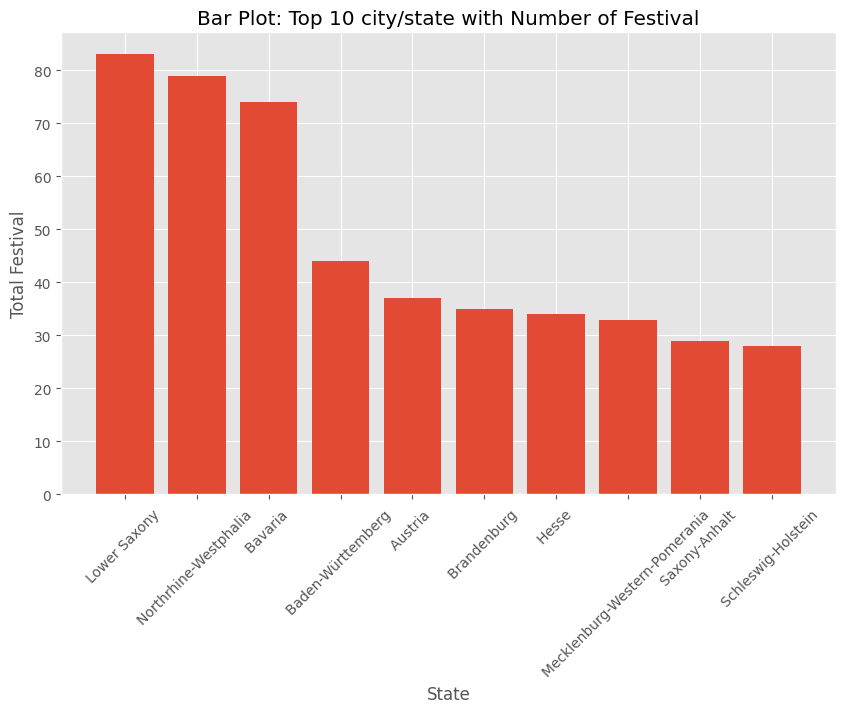

In [23]:
# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_festival['city_or_state'], total_festival['total_festival'])
plt.xlabel('State')
plt.ylabel('Total Festival')
plt.title('Bar Plot: Top 10 city/state with Number of Festival')
plt.xticks(rotation=45)
plt.show()


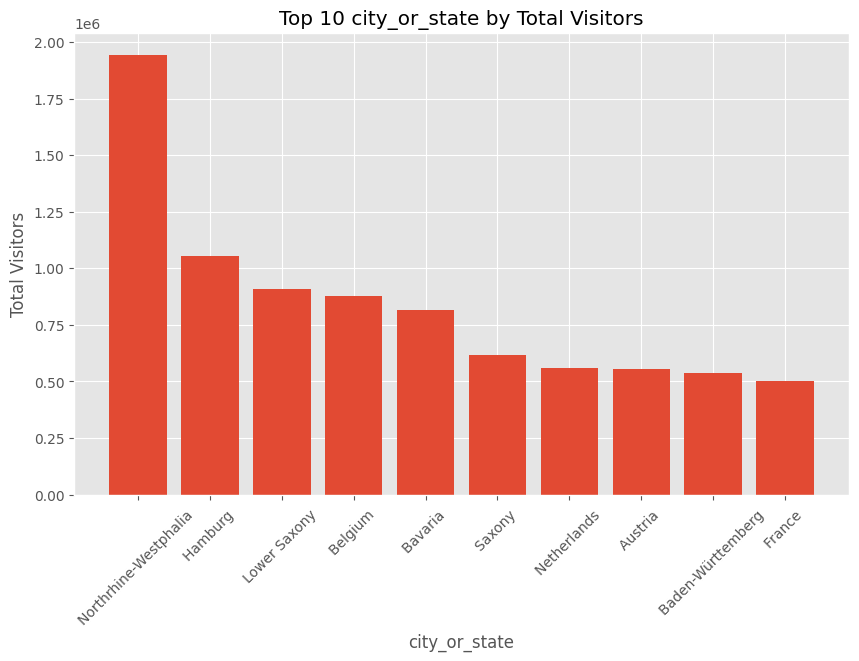

In [34]:
# Menghitung jumlah visitors berdasarkan state
visitors_by_state = df.groupby('city_or_state')['visitors'].sum().reset_index()

# Mengurutkan berdasarkan jumlah visitors secara menurun
top_10_states = visitors_by_state.nlargest(10, 'visitors')

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_states['city_or_state'], top_10_states['visitors'])
plt.xlabel('city_or_state')
plt.ylabel('Total Visitors')
plt.title('Top 10 city_or_state by Total Visitors')
plt.xticks(rotation=45)
plt.show()

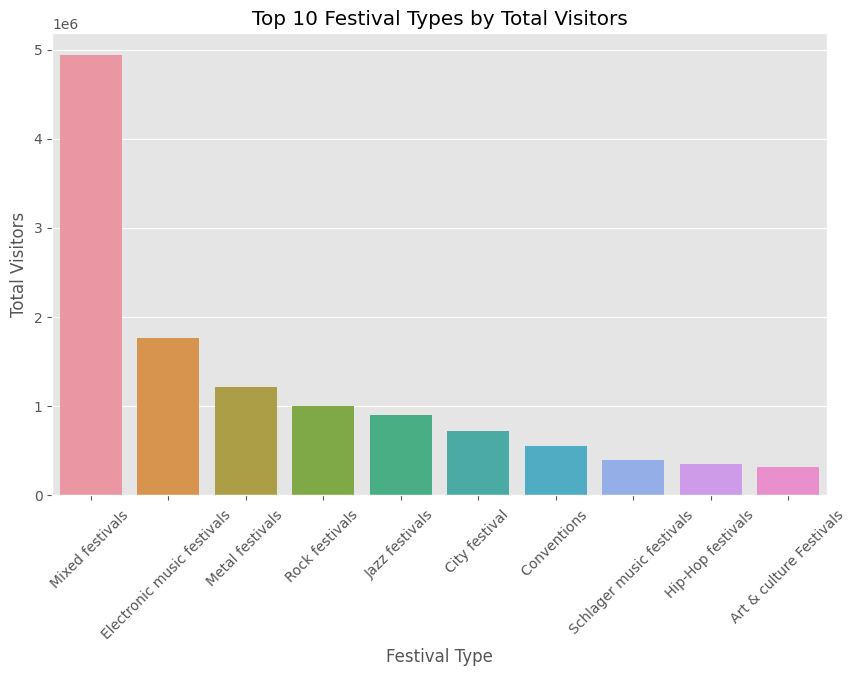

In [38]:
# Menghitung jumlah visitors berdasarkan Festival Type
visitors_by_type = df.groupby('festival_type')['visitors'].sum().reset_index()

# Mengurutkan berdasarkan jumlah visitors secara menurun
top_10_type = visitors_by_type.nlargest(10, 'visitors')

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='festival_type', y='visitors', data=top_10_type)
plt.xlabel('Festival Type')
plt.ylabel('Total Visitors')
plt.title('Top 10 Festival Types by Total Visitors')
plt.xticks(rotation=45)
plt.show()

                                           name  price
347                         Full Metal Holiday    1499
341                HRH Hard Rock Hell Festival     660
511   Coachella Valley Music and Arts Festival     528
50                                    Jazzopen     500
569           Feier dein buntes Leben Festival     500
139                          Foodrock Festival     452
37   schauinsland-reisen Jazz Rally Düsseldorf     428
693                       Snowbombing Festival     400
555                        Open Air Frauenfeld     344
479                              Rise Festival     329


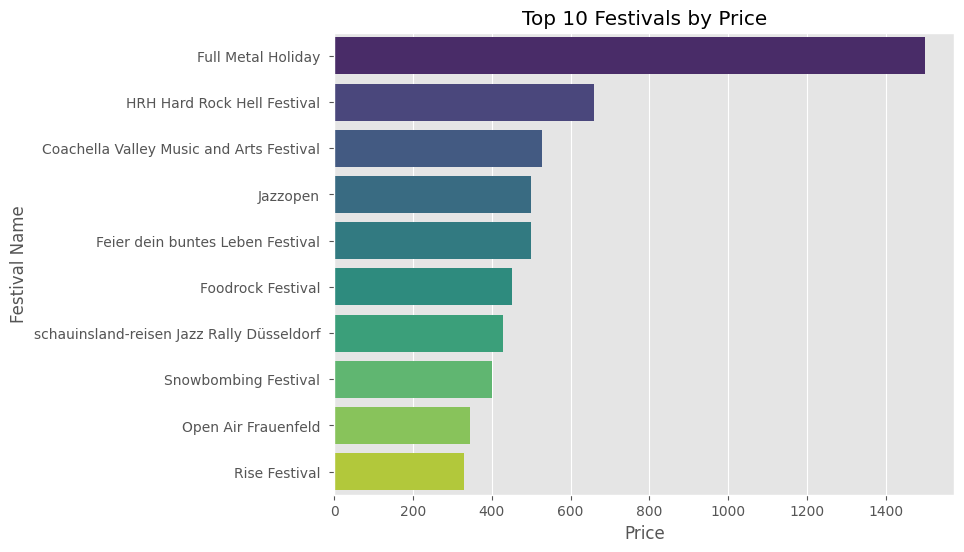

In [58]:
# Mengurutkan berdasarkan kolom 'price' secara menurun dan mengambil 10 baris teratas
top_10_festivals = df.nlargest(10, 'price')

# Memilih kolom 'name' dan 'price' dari DataFrame top 10 festival
top_10_festivals = top_10_festivals.loc[:, ['name', 'price']]

# Cetak DataFrame top 10 festival
print(top_10_festivals)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='price', y='name', data=top_10_festivals, palette='viridis')
plt.xlabel('Price')
plt.ylabel('Festival Name')
plt.title('Top 10 Festivals by Price')
plt.show()

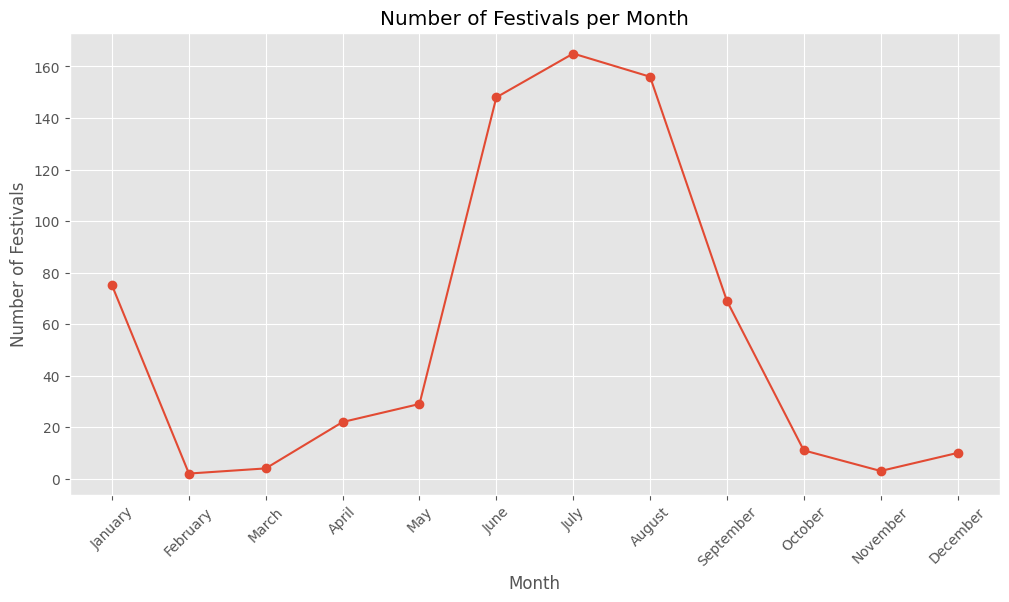

In [66]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt

# Mengubah kolom 'date' menjadi tipe data datetime
df['date'] = pd.to_datetime(df['date'])

# Replace missing values in 'date' column with a default value
df['date'] = df['date'].fillna(pd.to_datetime('2023-01-01'))

# Mengekstrak bulan dari kolom 'date' sebagai kolom baru 'month'
df['month'] = df['date'].dt.month.astype(int)

# Menghitung jumlah festival setiap bulan
festivals_per_month = df.groupby('month')['festival_type'].count()

# Mengganti angka bulan menjadi nama bulan
festivals_per_month.index = festivals_per_month.index.map(lambda x: calendar.month_name[x])

# Membuat line plot
plt.figure(figsize=(12, 6))
plt.plot(festivals_per_month.index, festivals_per_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Festivals')
plt.title('Number of Festivals per Month')
plt.xticks(rotation=45)  # Memutar label sumbu x agar legible
plt.grid(True)
plt.show()

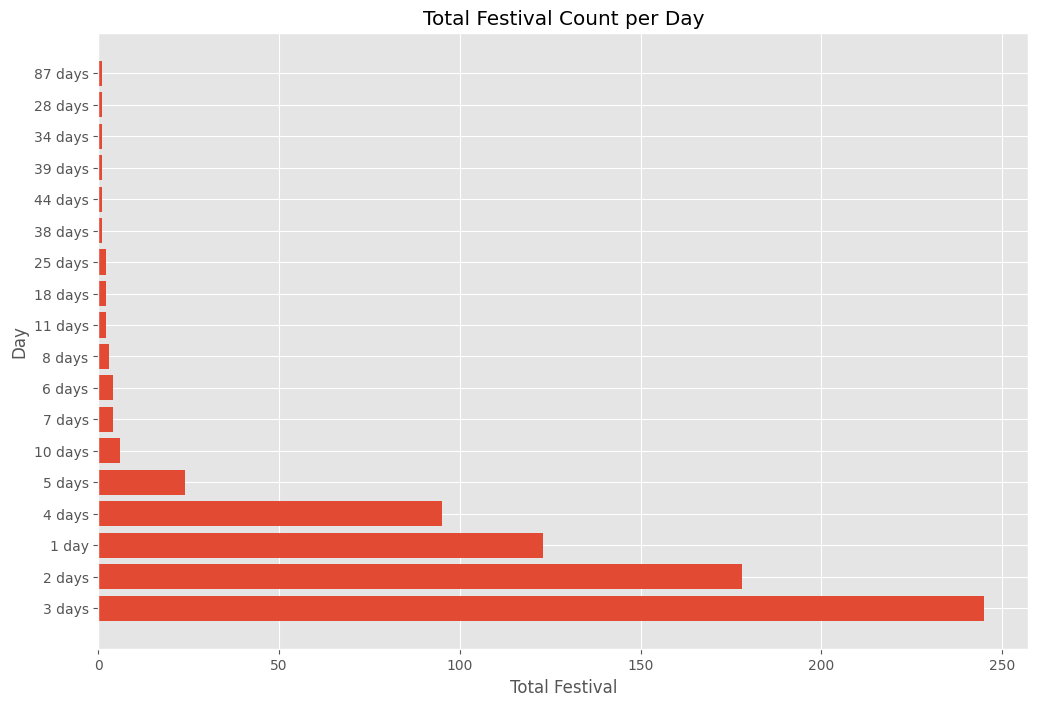

In [72]:
# Group the data by 'day' and calculate the count of festivals per day
day_counts = df['sum_day'].value_counts()

# Sort the values based on the day of the month
day_counts = day_counts.sort_index()

# Sort the values based on the count of festivals in descending order
day_counts = day_counts.sort_values(ascending=False)

# Extract the day values and the festival counts
days = day_counts.index
counts = day_counts.values

# Create the bar plot with reversed axis
plt.barh(days, counts)

# Set the labels and title
plt.xlabel('Total Festival')
plt.ylabel('Day')
plt.title('Total Festival Count per Day')

# Display the plot
plt.show()

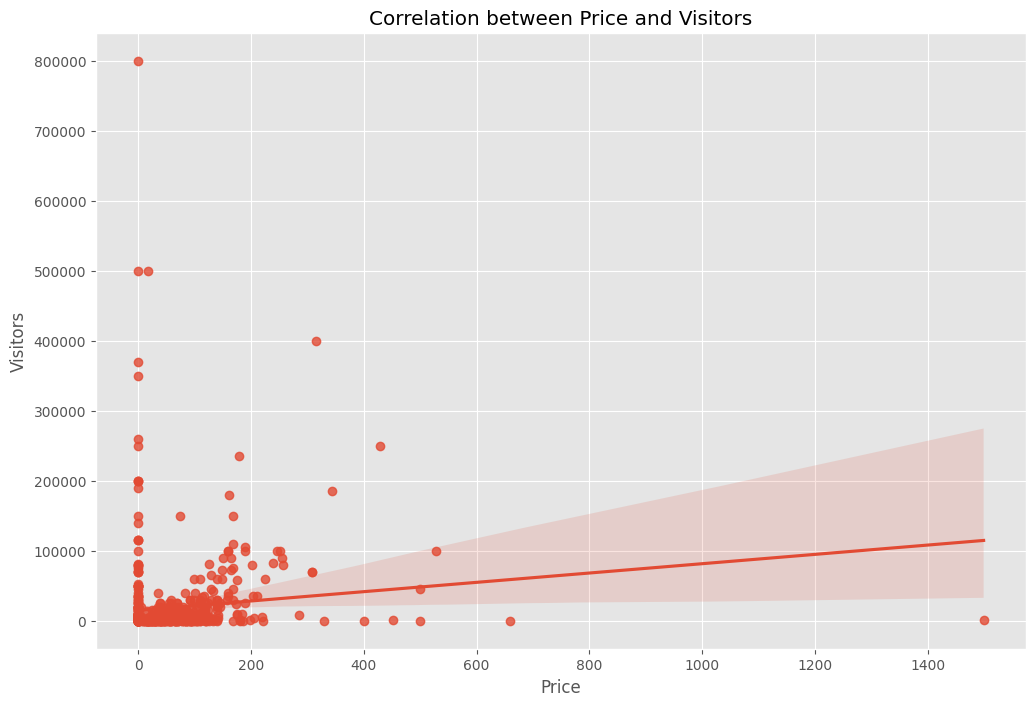

In [73]:
# Create a scatter plot with regression line
sns.regplot(x='price', y='visitors', data=df)

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Visitors')
plt.title('Correlation between Price and Visitors')

# Display the plot
plt.show()

In [74]:
#Company is not numeric, make it all numeric
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,sum_day,venue,festival_type,music_genre,city_or_state,string_field_7,visitors,price,date,month
name,1.000000,0.172840,-0.161701,0.912641,0.910799,0.121644,0.982200,0.178096,0.263750,0.171231,0.050592
sum_day,0.172840,1.000000,0.087904,0.172609,0.187121,0.136676,0.176313,0.080241,0.048813,0.186357,-0.191561
venue,-0.161701,0.087904,1.000000,-0.089461,-0.149208,-0.017464,-0.165258,-0.067915,-0.047665,0.208556,0.114153
festival_type,0.912641,0.172609,-0.089461,1.000000,0.877804,0.063545,0.895908,0.128000,0.230013,0.134932,-0.027330
music_genre,0.910799,0.187121,-0.149208,0.877804,1.000000,0.034374,0.888308,0.152794,0.241302,0.109986,0.023741
city_or_state,0.121644,0.136676,-0.017464,0.063545,0.034374,1.000000,0.129861,0.135920,0.094077,0.170358,0.031147
string_field_7,0.982200,0.176313,-0.165258,0.895908,0.888308,0.129861,1.000000,0.183962,0.259362,0.177449,0.050549
visitors,0.178096,0.080241,-0.067915,0.128000,0.152794,0.135920,0.183962,1.000000,0.108192,0.139241,0.047094
price,0.263750,0.048813,-0.047665,0.230013,0.241302,0.094077,0.259362,0.108192,1.000000,0.141590,0.023473
date,0.171231,0.186357,0.208556,0.134932,0.109986,0.170358,0.177449,0.139241,0.141590,1.000000,0.175083


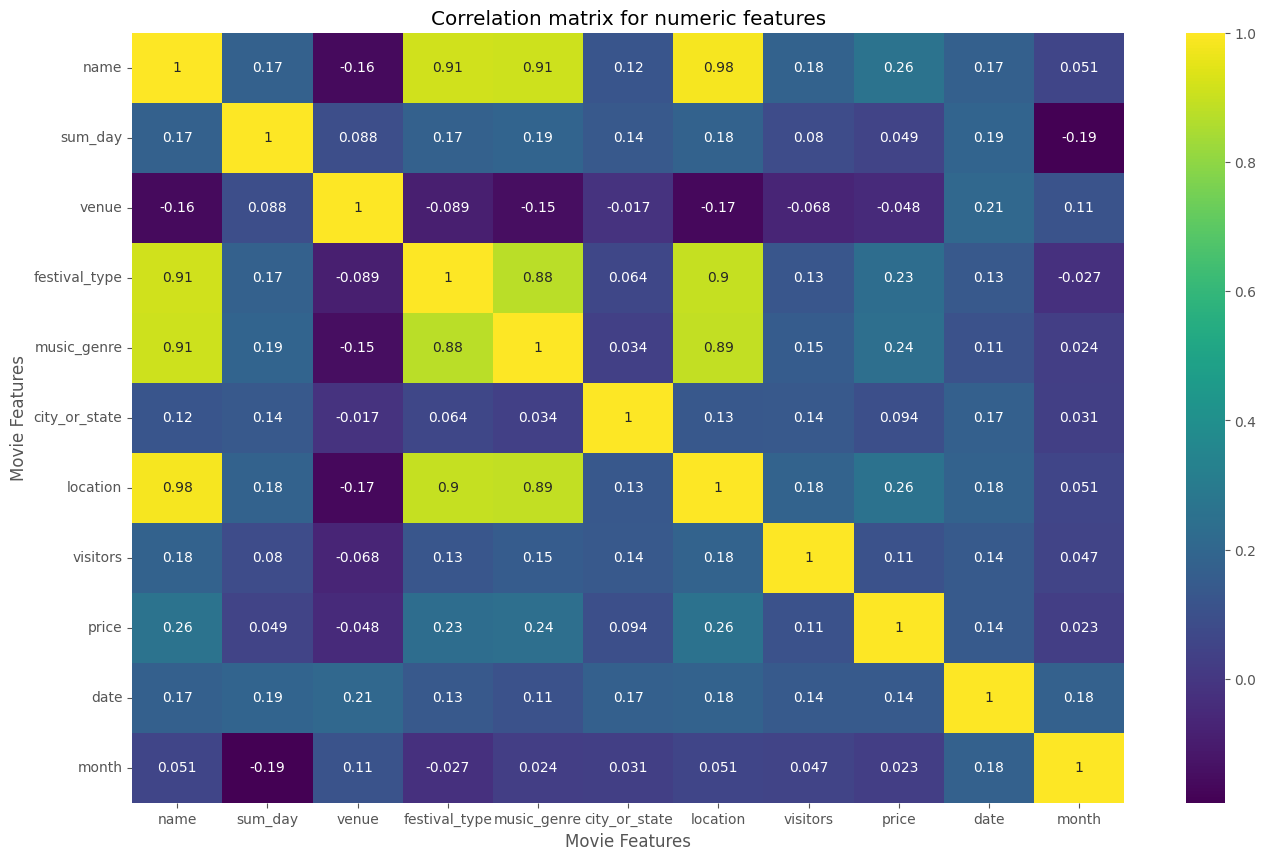

In [79]:
corr_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

plt.figure(figsize = (16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()